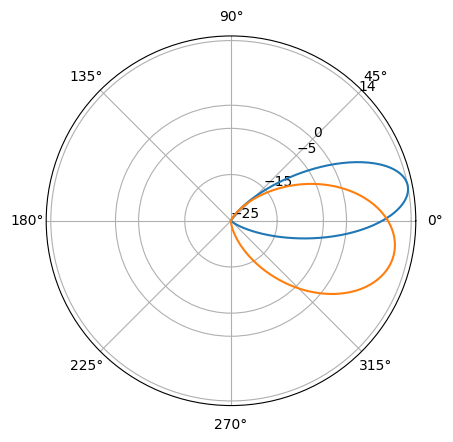

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from Model import Model
from BLEHardware import Transmitter, Receiver

def gain(theta, maxGain, falloff, offTheta):
  g = (maxGain+25) * np.power(np.cos(theta + offTheta),falloff)
  return g-25

def FSPL(gi,dis,pow):
  return gi + pow - (20*np.log10(dis)+40.05-(-10))

def rudimentaryNoise(g):
  noise = np.vectorize(noiser)(g)
  return noise

def noiser(gi):
  rnd = np.random.default_rng()
  noise_floor = -90
  if (gi - noise_floor) > 0:
    return gi
  else:
    return gi + (rnd.random() * (noise_floor - gi))


fig = plt.figure()
ax = fig.add_subplot(projection="polar")

theta = np.arange(-(np.pi/2),np.pi/2,0.01)[1:]
max=14

g1 = gain(theta,max,9,(-np.pi/16))
g2 = gain(theta,max-3,3,(np.pi/16))

#theta = np.where(g >= 0, theta, theta + np.pi)

ax.set_rlim(0,max+1)
ax.set_rticks([-25,-15,-5,0,max])
ax.set_rlabel_position(45)
ax.plot(theta,g1)
ax.plot(theta,g2)
plt.show()


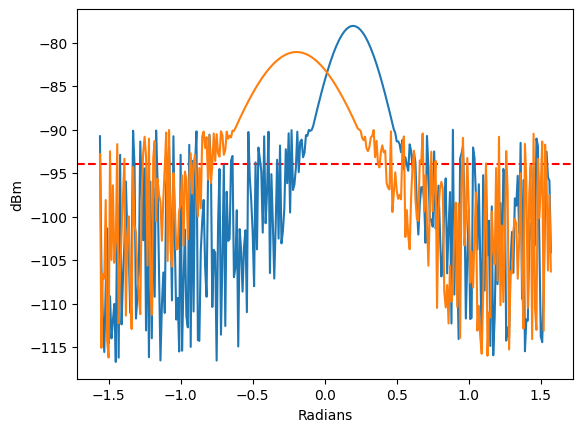

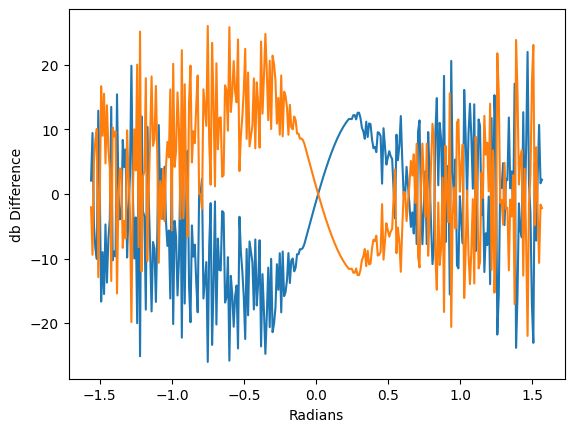

In [2]:
from basic_units import cos, degrees, radians
fig2 = plt.figure()
cx = fig2.add_subplot()

distance = 400 #meters

cx.set_xlabel("Radians")
cx.set_ylabel("dBm")
cx.axhline(y = -94, color = 'r', linestyle = '--') 

ng1 = rudimentaryNoise(FSPL(g1,distance,10))
ng2 = rudimentaryNoise(FSPL(g2,distance,10))
cx.plot(theta,ng1)
cx.plot(theta,ng2)

diff1 = ng1 - ng2
diff2 = ng2 - ng1

fig3 = plt.figure()
nx = fig3.add_subplot()
nx.set_xlabel("Radians")
nx.set_ylabel("db Difference")
nx.plot(theta,diff1)
nx.plot(theta,diff2)

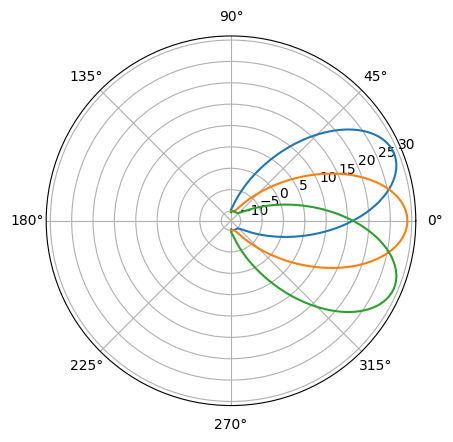

In [1]:
from Model import NewModel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

mod = NewModel(-94)
mod.plotTransmitters()
